In [1]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from resnets_utils import *
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from ResNet50 import ResNet50
%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [3]:
model = ResNet50(input_shape = (64, 64, 3), classes = 6)

In [4]:
model.compile(optimizer=optimizers.Adam(lr=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [6]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs = 500, batch_size = 32)

Train on 1080 samples, validate on 120 samples
Epoch 1/500
1080/1080 [==============================] - 10s 9ms/sample - loss: 1.9196 - accuracy: 0.3083 - val_loss: 1.8020 - val_accuracy: 0.1667
Epoch 2/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.1609 - accuracy: 0.5574 - val_loss: 1.8331 - val_accuracy: 0.1667
Epoch 3/500
1080/1080 [==============================] - 2s 1ms/sample - loss: 0.7843 - accuracy: 0.7176 - val_loss: 1.9118 - val_accuracy: 0.1667
Epoch 4/500
1080/1080 [==============================] - 5s 4ms/sample - loss: 0.5073 - accuracy: 0.8287 - val_loss: 1.9901 - val_accuracy: 0.1667
Epoch 5/500
1080/1080 [==============================] - 5s 5ms/sample - loss: 0.2819 - accuracy: 0.9157 - val_loss: 2.1042 - val_accuracy: 0.1667
Epoch 6/500
1080/1080 [==============================] - 5s 5ms/sample - loss: 0.1411 - accuracy: 0.9565 - val_loss: 2.2359 - val_accuracy: 0.1667
Epoch 7/500
1080/1080 [==============================] - 5s 5ms/sample

1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0422 - accuracy: 0.9880 - val_loss: 1.4500 - val_accuracy: 0.8083
Epoch 112/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0283 - accuracy: 0.9926 - val_loss: 1.2799 - val_accuracy: 0.7167
Epoch 113/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0244 - accuracy: 0.9898 - val_loss: 1.3225 - val_accuracy: 0.7667
Epoch 114/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0171 - accuracy: 0.9954 - val_loss: 1.5291 - val_accuracy: 0.7667
Epoch 115/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.9645 - val_accuracy: 0.8250
Epoch 116/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0355 - accuracy: 0.9907 - val_loss: 0.4450 - val_accuracy: 0.8667
Epoch 117/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0204 - accuracy: 0.9926 - val_loss: 0

1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4642 - val_accuracy: 0.9333
Epoch 167/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.4532 - val_accuracy: 0.9167
Epoch 168/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0065 - accuracy: 0.9972 - val_loss: 0.9418 - val_accuracy: 0.8917
Epoch 169/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.6217 - val_accuracy: 0.9333
Epoch 170/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 2.9489e-04 - accuracy: 1.0000 - val_loss: 0.5010 - val_accuracy: 0.9333
Epoch 171/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 3.1180e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.9417
Epoch 172/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.2104e-04 - accuracy: 1.0000 -

1080/1080 [==============================] - 2s 2ms/sample - loss: 3.3002e-05 - accuracy: 1.0000 - val_loss: 0.3979 - val_accuracy: 0.9333
Epoch 274/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 6.0037e-06 - accuracy: 1.0000 - val_loss: 0.4019 - val_accuracy: 0.9333
Epoch 275/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 5.9629e-06 - accuracy: 1.0000 - val_loss: 0.4035 - val_accuracy: 0.9333
Epoch 276/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.0173e-05 - accuracy: 1.0000 - val_loss: 0.4053 - val_accuracy: 0.9333
Epoch 277/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.4478e-05 - accuracy: 1.0000 - val_loss: 0.4051 - val_accuracy: 0.9333
Epoch 278/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 5.0321e-06 - accuracy: 1.0000 - val_loss: 0.4040 - val_accuracy: 0.9333
Epoch 279/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.0462e-04 - ac

Epoch 327/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.2656e-04 - accuracy: 1.0000 - val_loss: 0.1772 - val_accuracy: 0.9500
Epoch 328/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 2.8716e-05 - accuracy: 1.0000 - val_loss: 0.1780 - val_accuracy: 0.9500
Epoch 329/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 7.3824e-05 - accuracy: 1.0000 - val_loss: 0.1795 - val_accuracy: 0.9500
Epoch 330/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 3.6374e-05 - accuracy: 1.0000 - val_loss: 0.1810 - val_accuracy: 0.9500
Epoch 331/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 9.7461e-05 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 0.9583
Epoch 332/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 4.9561e-05 - accuracy: 1.0000 - val_loss: 0.1826 - val_accuracy: 0.9583
Epoch 333/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 0

Epoch 434/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.7918e-04 - accuracy: 1.0000 - val_loss: 0.2057 - val_accuracy: 0.9500
Epoch 435/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.1223e-04 - accuracy: 1.0000 - val_loss: 0.2064 - val_accuracy: 0.9500
Epoch 436/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 8.6262e-05 - accuracy: 1.0000 - val_loss: 0.2067 - val_accuracy: 0.9500
Epoch 437/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.4321e-04 - accuracy: 1.0000 - val_loss: 0.2052 - val_accuracy: 0.9417
Epoch 438/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 9.4743e-05 - accuracy: 1.0000 - val_loss: 0.2009 - val_accuracy: 0.9500
Epoch 439/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.3370e-04 - accuracy: 1.0000 - val_loss: 0.2019 - val_accuracy: 0.9500
Epoch 440/500
1080/1080 [==============================] - 2s 2ms/sample - loss: 6

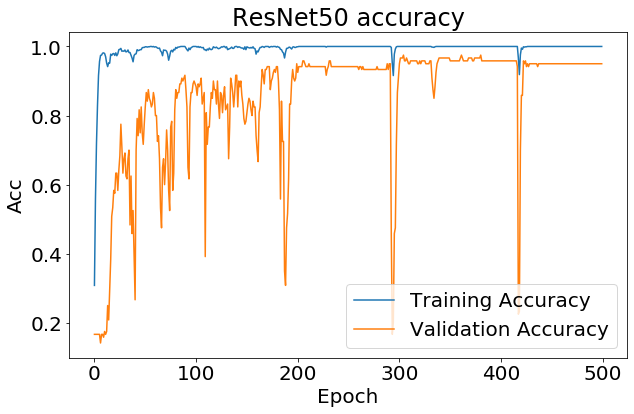

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig,ax = plt.subplots(1,1,figsize=(10,6))

ax.plot(acc, label='Training Accuracy')
ax.plot(val_acc, label='Validation Accuracy')

ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Acc', fontsize=20)
ax.set_title('ResNet50 accuracy', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=4, fontsize=20)

plt.show()

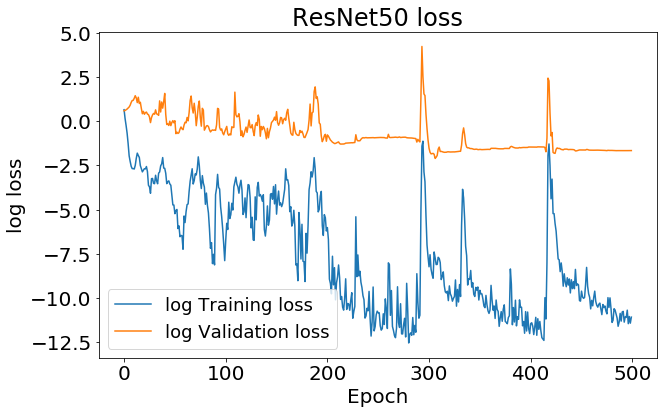

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

fig1,ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(np.log(loss), label='log Training loss')
ax1.plot(np.log(val_loss), label='log Validation loss')

ax1.set_xlabel(r'Epoch', fontsize=20)
ax1.set_ylabel(r'log loss', fontsize=20)
ax1.set_title('ResNet50 loss', fontsize=24)
ax1.tick_params(labelsize=20)

ax1.legend(loc=3, fontsize=18)

plt.show()